In [24]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

In [25]:
def synthetic_data(w,b,num_samples):
    X = torch.normal(0,1,(num_samples,len(w)))
    y = torch.matmul(X,w) + b
    y += torch.normal(0,0.01,y.shape)
    return X, y.reshape((-1,1))

true_b = 4.2
true_w = torch.tensor([2,-3.4])

#  返回样本特征 每一行都是一个二维的数据样本  然后是一个标签
features,labels = synthetic_data(true_w,true_b,1000)
print(features)



tensor([[ 2.7041, -0.8506],
        [ 0.9049, -1.4394],
        [ 1.6189, -0.4665],
        ...,
        [ 0.8072,  0.4603],
        [-1.0671, -1.0633],
        [-0.5910,  1.3394]])


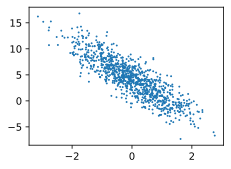

In [26]:
d2l.set_figsize()
d2l.plt.scatter(features[:,(1)].detach().numpy(),labels.detach().numpy(),1)

In [27]:
def data_iter(batch_size,features,labels):
    num_examples = len(features)
    indices = list(range(num_examples))  # 取出所有样本的序号 然后打乱

    random.shuffle(indices)  # 打乱所有的序号

    for i in range(0,num_examples,batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size,num_examples)])

        # 产生batch_size大小的 特征矩阵和标签向量
        yield features[batch_size],labels[batch_size]

In [28]:
batch_size = 10
for X,y in data_iter(batch_size,features,labels):
    print(X,'\n',y)
    break

tensor([0.0251, 0.1843]) 
 tensor([3.6129])


In [29]:
w = torch.normal(0,0.01,size=(2,1),requires_grad=True)
b = torch.zeros(1,requires_grad=True)

#  定义模型
def linreg(X,w,b):
    return torch.matmul(X,w) + b

#  定义损失  均方损失函数
def squared_loss(y_hat,y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2



In [30]:
# 定义优化算法
def sgd(params,lr,batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

In [31]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X,y in data_iter(batch_size,features,labels):
        l = loss(net(X,w,b),y)

        l.sum().backward()
        sgd([w,b],lr,batch_size)


    with torch.no_grad():
        train_l = loss(net(features,w,b),labels)
        print(f'epoch{epoch + 1}, loss{float(train_l.mean()):f}')

epoch1, loss13.598047
epoch2, loss11.939663
epoch3, loss11.028615


In [32]:
import numpy as np
import torch
from torch.utils import data
from d2l import torch as d2l

true_w = torch.tensor([2, -3.4])
true_b = 4.2
# 生成数据集
features, labels = d2l.synthetic_data(true_w, true_b, 1000)

In [34]:
def load_array(data_arrays,batch_size,is_train = True):
    dataset = data.TensorDataset(*data_arrays)
    return data.DataLoader(dataset,batch_size,shuffle = is_train)


batch_size = 10
data_iter = load_array((features,labels),batch_size=batch_size)
next(iter(data_iter))

[tensor([[ 1.7411,  0.1170],
         [-0.8892,  0.4046],
         [ 0.5315,  1.4991],
         [ 0.9684,  0.3056],
         [-0.2646, -1.6564],
         [-1.0047,  0.2747],
         [ 1.4510, -1.5244],
         [ 0.8831, -0.0235],
         [ 1.2521,  1.1072],
         [ 0.7268, -0.9445]]),
 tensor([[ 7.2570],
         [ 1.0609],
         [ 0.1663],
         [ 5.0966],
         [ 9.3072],
         [ 1.2439],
         [12.2750],
         [ 6.0456],
         [ 2.9312],
         [ 8.8589]])]

In [35]:
from torch import nn

#  定义网络模型 只有一个全连接层 参数是 输入特征和输出特征
net = nn.Sequential(nn.Linear(2,1))

#  初始化模型的参数
net[0].weight.data.normal_(0,0.01)  # 使用正态分布 初始化模型参数
net[0].bias.data.fill_(0)

# 损失函数
loss = nn.MSELoss()

# 定义优化算法
trainer = torch.optim.SGD(net.parameters(),lr = 0.03)

In [36]:
#  训练

num_epochs = 10

for epoch in range(num_epochs):
    for X, y in data_iter:
        l = loss(net(X),y)  # 计算损失
        trainer.zero_grad() # 梯度清0
        l.backward()  # 反向传播
        trainer.step()  # 优化器

    # 计算损失 
    l = loss(net(features),labels)
    print(f'epoch {epoch + 1}, loss {l:f}')

epoch 1, loss 0.000200
epoch 2, loss 0.000098
epoch 3, loss 0.000098
epoch 4, loss 0.000096
epoch 5, loss 0.000096
epoch 6, loss 0.000097
epoch 7, loss 0.000098
epoch 8, loss 0.000097
epoch 9, loss 0.000097
epoch 10, loss 0.000096


In [37]:
%matplotlib inline
import torch
import torchvision
from torch.utils import data
from torchvision import transforms
from d2l import torch as d2l

d2l.use_svg_display()

In [38]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(root="../data",train=True,transform=trans,download=True)
mnist_test = torchvision.datasets.FashionMNIST(root="../data",train=False,transform=trans,download=True)

100%|██████████| 26421880/26421880 [00:16<00:00, 1599798.22it/s]


Extracting ../data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 185615.66it/s]


Extracting ../data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:02<00:00, 1778352.98it/s]


Extracting ../data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 5161911.78it/s]


Extracting ../data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



In [39]:
len(mnist_train), len(mnist_test)

(60000, 10000)

In [40]:

mnist_train[0][0].shape

torch.Size([1, 28, 28])

In [41]:
def get_fashion_mnist_labels(labels):  #@save
    """返回Fashion-MNIST数据集的文本标签"""
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
                   'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [42]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):  #@save
    """绘制图像列表"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        if torch.is_tensor(img):
            # 图片张量
            ax.imshow(img.numpy())
        else:
            # PIL图片
            ax.imshow(img)
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

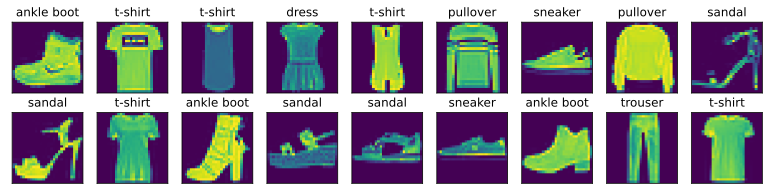

In [43]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
show_images(X.reshape(18, 28, 28), 2, 9, titles=get_fashion_mnist_labels(y));

In [44]:
#  使用dataloader读取小批量
batch_size = 256
def get_dataloader_workers():
    return 4


#  shuffle true标识 随机打乱所有样本  然后读取256张图片
data_iter = data.DataLoader(mnist_train,batch_size=batch_size,shuffle=True,num_workers=get_dataloader_workers())



In [46]:
def load_data_fashion_mnist(batch_size,resize = None):
    trans = [transforms.ToTensor()] # 转换为tensor

    if resize:
        trans.insert(0,transforms.Resize(resize))

    trans = transforms.Compose(trans)

    # 获取训练集和测试集
    mnist_train = torchvision.datasets.FashionMNIST(root = "../data",train=True,transform=trans,download=True)

    mnist_test = torchvision.datasets.FashionMNIST(root = "../data",train=False,transform=trans,download=True)

    return (data.DataLoader(mnist_train,batch_size=batch_size,shuffle=True,num_workers=get_dataloader_workers()),
            
            data.DataLoader(mnist_test,batch_size=batch_size,shuffle=False,num_workers=get_dataloader_workers()))




In [47]:
train_iter, test_iter = load_data_fashion_mnist(32, resize=64)
for X, y in train_iter:
    print(X.shape, X.dtype, y.shape, y.dtype)
    break

torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


In [48]:
import torch
from IPython import display
from d2l import torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [49]:
num_inputs = 784  # 将一张图片的所有像素都作为输入特征
num_outputs = 10
#  初始化权重和偏置
W = torch.normal(0,0.01,size =  (num_inputs,num_outputs),requires_grad=True)
b = torch.zeros(num_outputs,requires_grad=True)


In [50]:
#  定义softmax操作  将每一个样本的输出 都计算成概率
def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(1,keepdim = True)
    return X_exp / partition

X = torch.normal(0,1,(2,5))
X_prob = softmax(X)

# 每一行的概率都是1
X_prob,X_prob.sum()

(tensor([[0.0323, 0.1806, 0.0381, 0.4966, 0.2525],
         [0.0673, 0.1014, 0.0679, 0.3761, 0.3873]]),
 tensor(2.0000))

In [51]:
# 模型
def net(X):
    return softmax(torch.matmul(X.reshape((-1,W.shape[0])),W) + b)

In [52]:
y = torch.tensor([0,2])
y_hat = torch.tensor([[0.1,0.3,0.6],[0.3,0.2,0.5]])

#  交叉熵损失函数
def cross_entropy(y_hat,y):
    return -torch.log(y_hat[range(len(y_hat)),y])

cross_entropy(y_hat,y)  # 输出的是每一个样本的损失

tensor([2.3026, 0.6931])

In [63]:
# 计算正确率  统计正确的个数
def accuracy(y_hat,y):
    if len(y_hat.shape) > 1 and y_hat.shape[1] > 1:
        y_hat = y_hat.argmax(axis=1)

    cmp = y_hat.type(y.dtype) == y

    return float(cmp.type(y.dtype).sum())
def evaluate_accuracy(net, data_iter):  #@save
    """计算在指定数据集上模型的精度"""
    if isinstance(net, torch.nn.Module):
        net.eval()  # 将模型设置为评估模式
    metric = Accumulator(2)  # 正确预测数、预测总数
    with torch.no_grad():
        for X, y in data_iter:
            metric.add(accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [64]:
accuracy(y_hat,y) / len(y)

0.5

In [65]:
class Accumulator:  #@save
    """在n个变量上累加"""
    def __init__(self, n):
        self.data = [0.0] * n

    def add(self, *args):
        self.data = [a + float(b) for a, b in zip(self.data, args)]

    def reset(self):
        self.data = [0.0] * len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

In [67]:
def train_epoch_ch3(net,train_iter,loss,updater):

    # 将模型设置为训练模式
    if isinstance(net,torch.nn.Module):
        net.train()
    # 训练损失总和 训练准确度综合  样本数
    metric  = Accumulator(3)

    for X,y in train_iter:
        # 计算梯度并且更新参数
        y_hat = net(X)  # 计算预测值
        l = loss(y_hat,y) # 计算损失

        if isinstance(updater,torch.optim.Optimizer):
            # 使用Pytorch内置的优化器和损失函数
            updater.zero_grad()  # 梯度清零
            l.mean().backward()  # 反向传播
            updater.step() # 优化器
    

        else:
            l.sum().backward()
            updater(X.shape[0])

        metric.add(float(l.sum()),accuracy(y_hat,y),y.numel())

    #  返回训练损失和训练精度
    return metric[0] / metric[2],metric[1] / metric[2]


class Animator:  #@save
    """在动画中绘制数据"""
    def __init__(self, xlabel=None, ylabel=None, legend=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 fmts=('-', 'm--', 'g-.', 'r:'), nrows=1, ncols=1,
                 figsize=(3.5, 2.5)):
        # 增量地绘制多条线
        if legend is None:
            legend = []
        d2l.use_svg_display()
        self.fig, self.axes = d2l.plt.subplots(nrows, ncols, figsize=figsize)
        if nrows * ncols == 1:
            self.axes = [self.axes, ]
        # 使用lambda函数捕获参数
        self.config_axes = lambda: d2l.set_axes(
            self.axes[0], xlabel, ylabel, xlim, ylim, xscale, yscale, legend)
        self.X, self.Y, self.fmts = None, None, fmts

    def add(self, x, y):
        # 向图表中添加多个数据点
        if not hasattr(y, "__len__"):
            y = [y]
        n = len(y)
        if not hasattr(x, "__len__"):
            x = [x] * n
        if not self.X:
            self.X = [[] for _ in range(n)]
        if not self.Y:
            self.Y = [[] for _ in range(n)]
        for i, (a, b) in enumerate(zip(x, y)):
            if a is not None and b is not None:
                self.X[i].append(a)
                self.Y[i].append(b)
        self.axes[0].cla()
        for x, y, fmt in zip(self.X, self.Y, self.fmts):
            self.axes[0].plot(x, y, fmt)
        self.config_axes()
        display.display(self.fig)
        display.clear_output(wait=True)

In [68]:
def train_ch3(net, train_iter, test_iter, loss, num_epochs, updater):  #@save
    """训练模型（定义见第3章）"""
    animator = Animator(xlabel='epoch', xlim=[1, num_epochs], ylim=[0.3, 0.9],
                        legend=['train loss', 'train acc', 'test acc'])
    for epoch in range(num_epochs):
        train_metrics = train_epoch_ch3(net, train_iter, loss, updater)
        test_acc = evaluate_accuracy(net, test_iter)
        animator.add(epoch + 1, train_metrics + (test_acc,))
    train_loss, train_acc = train_metrics
    assert train_loss < 0.5, train_loss
    assert train_acc <= 1 and train_acc > 0.7, train_acc
    assert test_acc <= 1 and test_acc > 0.7, test_acc

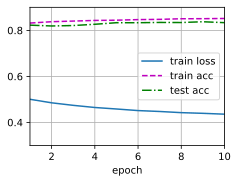

In [69]:
lr = 0.1
evaluate_accuracy(net, test_iter)
def updater(batch_size):
    return d2l.sgd([W, b], lr, batch_size)
num_epochs = 10
train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, updater)

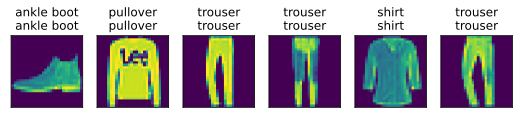

In [70]:
def predict_ch3(net, test_iter, n=6):  #@save
    """预测标签（定义见第3章）"""
    for X, y in test_iter:
        break
    trues = d2l.get_fashion_mnist_labels(y)
    preds = d2l.get_fashion_mnist_labels(net(X).argmax(axis=1))
    titles = [true +'\n' + pred for true, pred in zip(trues, preds)]
    d2l.show_images(
        X[0:n].reshape((n, 28, 28)), 1, n, titles=titles[0:n])

predict_ch3(net, test_iter)